In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as pltf

In [2]:
df = pd.read_csv("grid.csv")

In [3]:
df

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,Y Cooordinate,STATION,NAME,PRCP,SNOW,TMAX,TMIN,Ice,X,Y
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,855385.499846,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,36.0,13.0,True,-71.277587,41.948610
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,853612.562628,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.296220,41.932683
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,855354.687686,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.277947,41.948334
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,853458.807973,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.260316,41.931229
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,854228.434641,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.291080,41.938218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19540,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,853752.895515,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.310037,41.933970
19541,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,856069.010987,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.304793,41.954814
19542,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,852126.693416,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.299166,41.919310
19543,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,854014.625000,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.1,26.0,10.0,True,-71.286086,41.936284


Removing Outliers

Boundary points of Attleboro: (41.986995,-71.269167), (41.915942, -71.381659), (41.893229,-71.381859), 41.908669, -71.207136)

In [4]:
max_long = -71.20713600
min_long = -71.38185900
min_lat = 41.89322900
max_lat = 41.98699500

In [5]:
df1 = df[df['X'].le(max_long) & df['X'].gt(min_long)]

In [6]:
df2 = df1[df1['Y'].le(max_lat) & df1['Y'].gt(min_lat)]

In [7]:
df2

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,Y Cooordinate,STATION,NAME,PRCP,SNOW,TMAX,TMIN,Ice,X,Y
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,855385.499846,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,36.0,13.0,True,-71.277587,41.948610
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,853612.562628,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.296220,41.932683
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,855354.687686,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.277947,41.948334
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,853458.807973,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.260316,41.931229
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,854228.434641,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.291080,41.938218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19540,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,853752.895515,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.310037,41.933970
19541,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,856069.010987,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.304793,41.954814
19542,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,852126.693416,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.299166,41.919310
19543,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,854014.625000,USC00198368,"NWS BOSTON NORTON, MA US",0.0,0.1,26.0,10.0,True,-71.286086,41.936284


In [8]:
bottomLeft = (min_long, min_lat)
bottomRight = (max_long, min_lat)
topLeft = (min_long,max_lat)
topRight = (max_long,max_lat)

cols = np.linspace(bottomLeft[0], bottomRight[0], num=12)
rows = np.linspace(bottomLeft[1], topLeft[1], num=9)
df2['col'] = np.searchsorted(cols, df2['X'])
df2['row'] = np.searchsorted(rows, df2['Y'])

<ipython-input-8-c2a0a9aba525>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['col'] = np.searchsorted(cols, df2['X'])
<ipython-input-8-c2a0a9aba525>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['row'] = np.searchsorted(rows, df2['Y'])


the difference in longitude is 0.174 degrees. each degree long is 69 miles . hence 0.174 degree is 12.05miles.  Each degree latitude is again approximately 69 miles. The diffrence in degree lat is 0.093. hence 0.093 degree is 6.47 miles.Attleboro is 12.10 by 6.5 miles approximately. stretching 12.10 miles from eaat to west (horizontally) and running 6.5 miles north to south (vertically). let's divide the land into chunks each of approximately 1 mile by 0.722 mile. 12 col and 9 rows. 108 chunks.

In [9]:
df2

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,NAME,PRCP,SNOW,TMAX,TMIN,Ice,X,Y,col,row
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,"NWS BOSTON NORTON, MA US",0.0,0.0,36.0,13.0,True,-71.277587,41.948610,7,5
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.296220,41.932683,6,4
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.277947,41.948334,7,5
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.260316,41.931229,8,4
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,19.0,True,-71.291080,41.938218,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19540,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.310037,41.933970,5,4
19541,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.304793,41.954814,5,6
19542,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,"NWS BOSTON NORTON, MA US",0.0,0.0,39.0,21.0,True,-71.299166,41.919310,6,3
19543,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,"NWS BOSTON NORTON, MA US",0.0,0.1,26.0,10.0,True,-71.286086,41.936284,7,4


In [10]:
df2['col'].unique()

array([ 7,  6,  8,  2,  5,  4,  9,  1, 10,  3], dtype=int64)

In [11]:
c = list(pd.Series(range(1,13)))
r = list(pd.Series(range(1,10)))
x = -71.374609
y = 41.898438
long_diff = 0.174/12
lat_diff = 0.093/9
tick = 1
midx = []
midy = []
col = []
row = []
block = []
for n in c:
    mx = x
    y = 41.898438
    for m in r:
        my=y
        midx.append(mx)
        midy.append(my)
        y+=lat_diff
        col.append(n)
        row.append(m)
        block.append(tick)
        tick+=1
    x+=long_diff


In [12]:
data = []
data.append(col)
data.append(row)
data.append(block)
data.append(midx)
data.append(midy)

In [13]:
data

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  1,
  2,
  3,
  4,
  5,
  

In [14]:
grid = pd.DataFrame(data).transpose()
grid.columns=['col', 'row','block', 'MP_X', 'MP_Y']

In [15]:
grid

,col,row,block,MP_X,MP_Y
0,1.0,1.0,1.0,-71.374609,41.898438
1,1.0,2.0,2.0,-71.374609,41.908771
2,1.0,3.0,3.0,-71.374609,41.919105
3,1.0,4.0,4.0,-71.374609,41.929438
4,1.0,5.0,5.0,-71.374609,41.939771
...,...,...,...,...,...
103,12.0,5.0,104.0,-71.215109,41.939771
104,12.0,6.0,105.0,-71.215109,41.950105
105,12.0,7.0,106.0,-71.215109,41.960438
106,12.0,8.0,107.0,-71.215109,41.970771


In [16]:
grid2 = pd.merge(df2,grid, how = 'left')

In [17]:
grid2

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,TMAX,TMIN,Ice,X,Y,col,row,block,MP_X,MP_Y
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,36.0,13.0,True,-71.277587,41.948610,7,5,59.0,-71.287609,41.939771
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,39.0,19.0,True,-71.296220,41.932683,6,4,49.0,-71.302109,41.929438
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,39.0,19.0,True,-71.277947,41.948334,7,5,59.0,-71.287609,41.939771
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,39.0,19.0,True,-71.260316,41.931229,8,4,67.0,-71.273109,41.929438
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,39.0,19.0,True,-71.291080,41.938218,6,4,49.0,-71.302109,41.929438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,39.0,21.0,True,-71.310037,41.933970,5,4,40.0,-71.316609,41.929438
19528,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,39.0,21.0,True,-71.304793,41.954814,5,6,42.0,-71.316609,41.950105
19529,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,39.0,21.0,True,-71.299166,41.919310,6,3,48.0,-71.302109,41.919105
19530,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,26.0,10.0,True,-71.286086,41.936284,7,4,58.0,-71.287609,41.929438


In [18]:
grid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19532 entries, 0 to 19531
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DATE                              19532 non-null  object 
 1   Crash Time                        19532 non-null  object 
 2   Crash Severity                    19532 non-null  object 
 3   Maximum Injury Severity Reported  19532 non-null  object 
 4   Number of Vehicles                19532 non-null  int64  
 5   Total Nonfatal Injuries           19532 non-null  int64  
 6   Total Fatal Injuries              19532 non-null  int64  
 7   Manner of Collision               19532 non-null  object 
 8   Vehicle Action Prior to Crash     19532 non-null  object 
 9   Vehicle Travel Directions         19532 non-null  object 
 10  Road Surface Condition            19532 non-null  object 
 11  Ambient Light                     19532 non-null  object 
 12  Weat

In [29]:
grid2['block'].value_counts()

59.0    2817
12.0    1893
11.0    1562
10.0    1292
49.0    1138
1.0     1082
58.0    1063
31.0     915
50.0     888
51.0     806
40.0     715
52.0     625
42.0     513
69.0     432
67.0     293
48.0     271
21.0     261
60.0     198
65.0     191
38.0     185
20.0     182
13.0     166
39.0     165
2.0      159
66.0     133
41.0     133
78.0     123
30.0     122
56.0     108
3.0      105
28.0     100
19.0      96
76.0      88
84.0      86
47.0      83
29.0      81
75.0      77
22.0      68
68.0      60
61.0      47
77.0      37
57.0      35
37.0      34
62.0      26
85.0      20
83.0      20
70.0      13
23.0       7
46.0       6
53.0       3
86.0       3
33.0       2
32.0       2
74.0       1
43.0       1
Name: block, dtype: int64

In [33]:
grid2['mid_point'] = list(zip(grid2['MP_X'],grid2['MP_Y']))

In [34]:
grid2

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,TMIN,Ice,X,Y,col,row,block,MP_X,MP_Y,mid_point
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,13.0,True,-71.277587,41.948610,7,5,59.0,-71.287609,41.939771,"(-71.28760900000002, 41.93977133333334)"
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,19.0,True,-71.296220,41.932683,6,4,49.0,-71.302109,41.929438,"(-71.30210900000002, 41.929438000000005)"
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,19.0,True,-71.277947,41.948334,7,5,59.0,-71.287609,41.939771,"(-71.28760900000002, 41.93977133333334)"
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,19.0,True,-71.260316,41.931229,8,4,67.0,-71.273109,41.929438,"(-71.27310900000002, 41.929438000000005)"
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,19.0,True,-71.291080,41.938218,6,4,49.0,-71.302109,41.929438,"(-71.30210900000002, 41.929438000000005)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,21.0,True,-71.310037,41.933970,5,4,40.0,-71.316609,41.929438,"(-71.31660900000001, 41.929438000000005)"
19528,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,21.0,True,-71.304793,41.954814,5,6,42.0,-71.316609,41.950105,"(-71.31660900000001, 41.950104666666675)"
19529,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,21.0,True,-71.299166,41.919310,6,3,48.0,-71.302109,41.919105,"(-71.30210900000002, 41.91910466666667)"
19530,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,10.0,True,-71.286086,41.936284,7,4,58.0,-71.287609,41.929438,"(-71.28760900000002, 41.929438000000005)"


JPEG
RGB
(1201, 865)


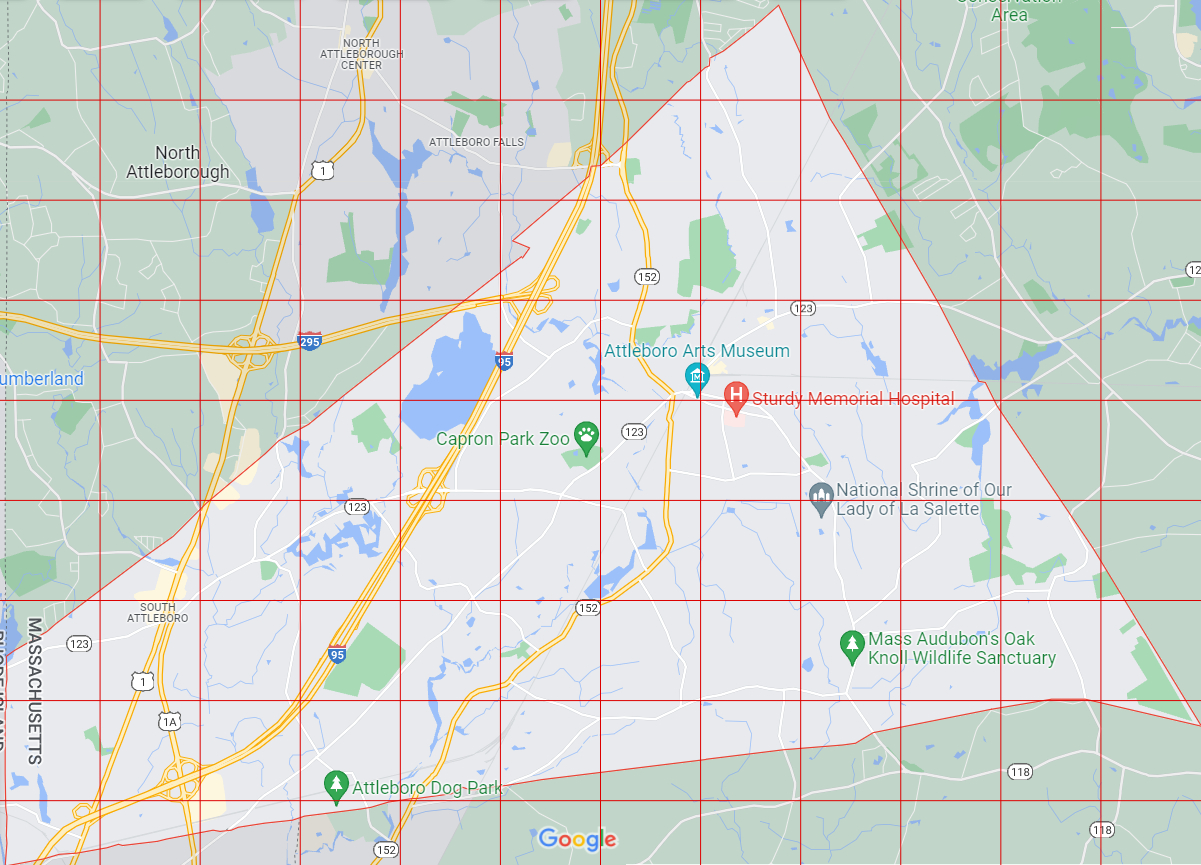

In [43]:
#Load and show an image with Pillow
from PIL import Image

#Load the image
img = Image.open('drawing_grid (1).jpg')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)

#show the image
img

In [55]:
column=set(grid2[grid2['block']==59]['col'])
row=set(grid2[grid2['block']==59]['row'])
mid_point=set(grid2[grid2['block']==59]['mid_point'])


In [60]:
column

{5}

In [61]:
row

{5}

In [62]:
mid_point

{(-71.28760900000002, 41.93977133333334)}

In [63]:
# Import module
from geopy.geocoders import Nominatim
 
# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
 
# Assign Latitude & Longitude
Latitude = "41.939771"
Longitude = "-71.287609"
 
# Displaying Latitude and Longitude
print("Latitude: ", Latitude)
print("Longitude: ", Longitude)
 
# Get location with geocode
location = geolocator.geocode(Latitude+","+Longitude)
 
# Display location
print("\nLocation of the given Latitude and Longitude:")
print(location)

Latitude:  41.939771
Longitude:  -71.287609

Location of the given Latitude and Longitude:
Riverfront Drive, Attleboro, Bristol County, Massachusetts, 02703, United States


In [19]:
grid2['block'] = grid2["col"].map(str)+ grid2["row"].map(str)

In [20]:
grid2

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,TMAX,TMIN,Ice,X,Y,col,row,MP_X,MP_Y,block
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,36.0,13.0,True,-71.277587,41.948610,7,5,-71.287609,41.939771,75
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,39.0,19.0,True,-71.296220,41.932683,6,4,-71.302109,41.929438,64
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,39.0,19.0,True,-71.277947,41.948334,7,5,-71.287609,41.939771,75
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,39.0,19.0,True,-71.260316,41.931229,8,4,-71.273109,41.929438,84
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,39.0,19.0,True,-71.291080,41.938218,6,4,-71.302109,41.929438,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,39.0,21.0,True,-71.310037,41.933970,5,4,-71.316609,41.929438,54
19528,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,39.0,21.0,True,-71.304793,41.954814,5,6,-71.316609,41.950105,56
19529,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,39.0,21.0,True,-71.299166,41.919310,6,3,-71.302109,41.919105,63
19530,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,26.0,10.0,True,-71.286086,41.936284,7,4,-71.287609,41.929438,74


In [29]:
grid2.columns

Index(['DATE', 'Crash Time', 'Crash Severity',
       'Maximum Injury Severity Reported', 'Number of Vehicles',
       'Total Nonfatal Injuries', 'Total Fatal Injuries',
       'Manner of Collision', 'Vehicle Action Prior to Crash',
       'Vehicle Travel Directions', 'Road Surface Condition', 'Ambient Light',
       'Weather Condition', 'X Cooordinate', 'Y Cooordinate', 'STATION',
       'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN', 'Ice', 'X', 'Y', 'col', 'row',
       'MP_X', 'MP_Y', 'block'],
      dtype='object')

In [30]:
grid2['Weather Condition'].value_counts()

Clear          12724
Cloudy          3069
Rain            1544
Cloudy/Rain     1100
Snow            1040
Fog               55
Name: Weather Condition, dtype: int64

In [31]:
model_data = pd.get_dummies(grid2, drop_first = True, columns = ['Weather Condition'])

In [32]:
model_data.columns

Index(['DATE', 'Crash Time', 'Crash Severity',
       'Maximum Injury Severity Reported', 'Number of Vehicles',
       'Total Nonfatal Injuries', 'Total Fatal Injuries',
       'Manner of Collision', 'Vehicle Action Prior to Crash',
       'Vehicle Travel Directions', 'Road Surface Condition', 'Ambient Light',
       'X Cooordinate', 'Y Cooordinate', 'STATION', 'NAME', 'PRCP', 'SNOW',
       'TMAX', 'TMIN', 'Ice', 'X', 'Y', 'col', 'row', 'MP_X', 'MP_Y', 'block',
       'Weather Condition_Cloudy', 'Weather Condition_Cloudy/Rain',
       'Weather Condition_Fog', 'Weather Condition_Rain',
       'Weather Condition_Snow'],
      dtype='object')

In [41]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19532 entries, 0 to 19531
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DATE                              19532 non-null  object 
 1   Crash Time                        19532 non-null  object 
 2   Crash Severity                    19532 non-null  object 
 3   Maximum Injury Severity Reported  19532 non-null  object 
 4   Number of Vehicles                19532 non-null  int64  
 5   Total Nonfatal Injuries           19532 non-null  int64  
 6   Total Fatal Injuries              19532 non-null  int64  
 7   Manner of Collision               19532 non-null  object 
 8   Vehicle Action Prior to Crash     19532 non-null  object 
 9   Vehicle Travel Directions         19532 non-null  object 
 10  Road Surface Condition            19532 non-null  object 
 11  Ambient Light                     19532 non-null  object 
 12  X Co

In [49]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


In [33]:
X = model_data[['Weather Condition_Cloudy', 'Weather Condition_Cloudy/Rain', 'Weather Condition_Fog',
       'Weather Condition_Rain', 'Weather Condition_Snow','SNOW',
       'PRCP', 'TMAX','TMIN', 'Ice']]
y = model_data[['block']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=899)

In [53]:
X_train

,Weather Condition_Cloudy,Weather Condition_Cloudy/Rain,Weather Condition_Fog,Weather Condition_Rain,Weather Condition_Snow,SNOW,PRCP,TMAX,TMIN,Ice
18570,0,0,0,0,1,0.5,0.04,31.0,25.0,True
3212,0,0,0,0,0,0.0,0.00,78.0,57.0,False
12098,0,0,0,0,0,0.0,0.00,50.0,27.0,True
18633,0,0,0,0,0,0.0,0.00,47.0,16.0,True
15722,0,0,0,0,0,0.0,0.00,65.0,30.0,True
...,...,...,...,...,...,...,...,...,...,...
2818,0,0,0,0,0,0.0,0.00,34.0,14.0,True
4708,0,0,0,0,1,0.0,0.05,33.0,21.0,True
208,1,0,0,0,0,0.0,0.00,47.0,26.0,True
17840,0,0,0,0,0,0.0,0.00,62.0,41.0,False


In [56]:
y_train

,block
18570,74
3212,65
12098,21
18633,62
15722,56
...,...
2818,65
4708,22
208,21
17840,75


In [45]:
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)

C:\Users\khurr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\khurr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [46]:
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions) 

0.14680660437731985

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
my_accident = [1, 0, 0, 0, 0, 0, 0, 0, -10, 1]
output = model.predict([my_accident])
print(int(output))

49


In [ ]:
# Import module
from geopy.geocoders import Nominatim
 
# Initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
 
# Assign Latitude & Longitude
Latitude = "41.95"
Longitude = "-71.28"
 
# Displaying Latitude and Longitude
print("Latitude: ", Latitude)
print("Longitude: ", Longitude)
 
# Get location with geocode
location = geolocator.geocode(Latitude+","+Longitude)
 
# Display location
print("\nLocation of the given Latitude and Longitude:")
print(location)